# Machine Learning Foundation

Regression Setup, one hot encoding and Train-test Split 

**BY SALAMI BAYONLE LUKMAN**

## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

*   SalePrice: The property's sale price in dollars.

### Features

*   MoSold: Month Sold
*   YrSold: Year Sold
*   SaleType: Type of sale
*   SaleCondition: Condition of sale
*   MSSubClass: The building class
*   MSZoning: The general zoning classification
*   ...


### Importing Libraries

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd
import numpy as np

# Import the data using the file path
data = pd.read_csv("Ames_Housing_Sales.csv")
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [3]:
data.shape

(1379, 80)

In [4]:
data.size

110320

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [6]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

## Question 2

A significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly.

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.


In [7]:
# Select the object (string) columns
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

In [8]:
data[categorical_cols].apply(lambda x: x.unique())

Alley                                           [None, Grvl, Pave]
BldgType                     [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
BsmtCond                                        [TA, Gd, None, Fa]
BsmtExposure                                [No, Gd, Mn, Av, None]
BsmtFinType1                       [GLQ, ALQ, None, Rec, BLQ, LwQ]
BsmtFinType2                  [Unf, BLQ, None, ALQ, Rec, LwQ, GLQ]
BsmtQual                                    [Gd, TA, Ex, None, Fa]
CentralAir                                                  [Y, N]
Condition1       [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...
Condition2       [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ...
Electrical                       [SBrkr, FuseF, FuseA, FuseP, Mix]
ExterCond                                         [TA, Gd, Fa, Ex]
ExterQual                                         [Gd, TA, Ex, Fa]
Exterior1st      [VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ...
Exterior2nd      [VinylSd, MetalSd, Wd Shng, HdBoard, Plywood,

In [9]:
data[categorical_cols].apply(lambda x: x.nunique())

Alley             3
BldgType          5
BsmtCond          4
BsmtExposure      5
BsmtFinType1      6
BsmtFinType2      7
BsmtQual          5
CentralAir        2
Condition1        9
Condition2        8
Electrical        5
ExterCond         4
ExterQual         4
Exterior1st      14
Exterior2nd      16
Fence             5
FireplaceQu       6
Foundation        6
Functional        7
GarageCond        5
GarageFinish      3
GarageQual        5
GarageType        6
Heating           6
HeatingQC         5
HouseStyle        8
KitchenQual       4
LandContour       4
LandSlope         3
LotConfig         5
LotShape          4
MSZoning          5
MasVnrType        4
MiscFeature       5
Neighborhood     25
PavedDrive        3
PoolQC            4
RoofMatl          8
RoofStyle         6
SaleCondition     6
SaleType          9
Street            2
Utilities         2
dtype: int64

In [10]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

215

## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

*   Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
*   On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
*   For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn's `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)


In [11]:
df = data.copy()

In [12]:
cols = df.select_dtypes([np.object])
cols.dtypes.value_counts()

object    43
dtype: int64

In [13]:
cols.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub


In [14]:
df1 = df.drop(cols, axis=1)
    
df1.dtypes.value_counts()

float64    21
int64      16
dtype: int64

In [15]:
df4 = pd.get_dummies(cols)
df4

,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1375,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1376,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1377,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [16]:
df_ohe = pd.concat([df1, df4], axis=1)
df_ohe.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,1,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,1,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,1,0,1,1,0


In [17]:
# Column difference is as calculated above
df_ohe.shape[1] - data.shape[1]

215

In [18]:
print(data.shape[1])

# Remove the string columns from the dataframe
data = data.drop(cols, axis=1)

print(data.shape[1])

80
37


## Question 4

*   Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
*   For each data set, fit a basic linear regression model on the training data.
*   Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?


In [23]:
X = df_ohe.drop('SalePrice', axis = 1)
X.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,1,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,1,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,1,0,1,1,0


In [24]:
y = df_ohe[['SalePrice']]
y.head()

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


## Train_Test_Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (965, 294) (965, 1)
Test set: (414, 294) (414, 1)


In [40]:
# Libraries for plotting

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Sales Price ($)')
    plt.ylabel('Proportion')
    plt.legend()

    plt.show()
    plt.close()

## USING SEVERAL REGRESION MODELS

In [89]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression(normalize=True))])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [90]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -372760169975455808.000000 
DecisionTree: -42856.158751 
RandomForest: -31216.894209 
KNeighbors: -44039.795755 
XGBRegressor: -29613.653203 


Testing the Model with the best score on the test set

In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters.

In [91]:
# Model prediction on test data using XGBOOST
pred = pipeline_xgb.predict(X_test)

# Model Evaluation XGBClassifier
print("R^2:",r2_score(y_test,pred))
print("Adjusted R^2:",1 - (1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

R^2: 0.8801534557009748
Adjusted R^2: 0.5840619933151479
MAE: 17287.689226675724
MSE: 729675650.1802144
RMSE: 27012.50914262158


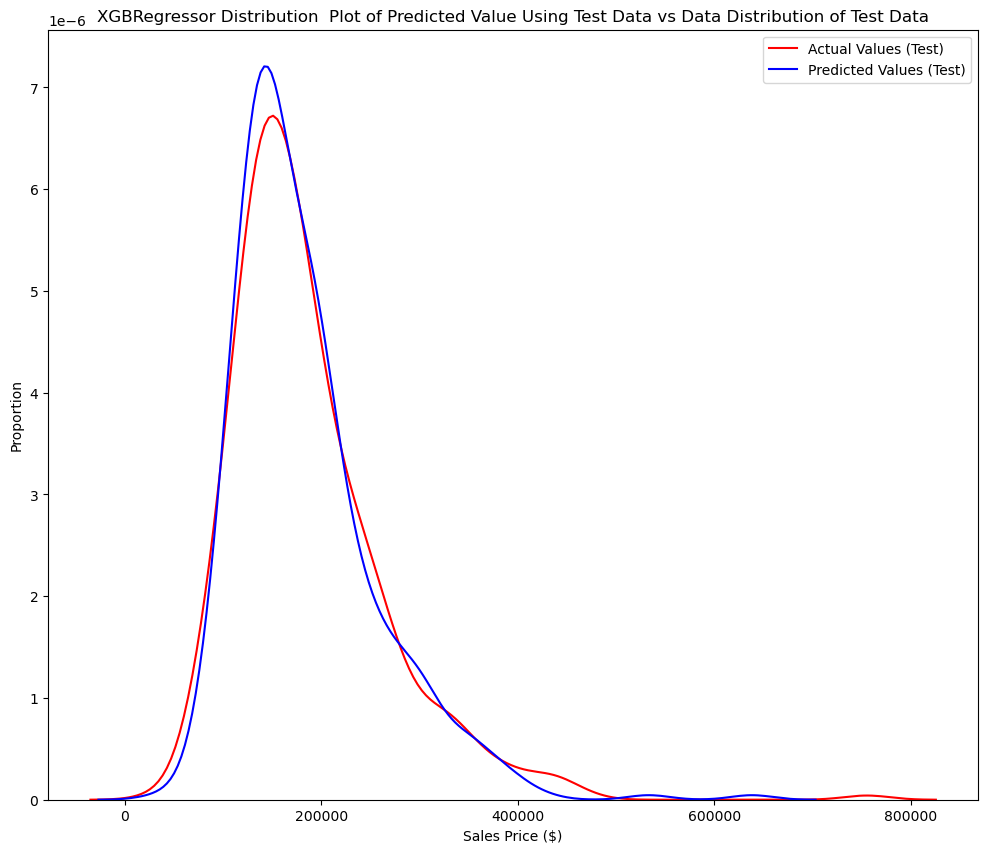

In [92]:
Title='XGBRegressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,pred,"Actual Values (Test)","Predicted Values (Test)",Title)

In [93]:
# Model Evaluation Random Forest Regressor
predr = pipeline_rf.predict(X_test)

print("R^2:",metrics.r2_score(y_test, predr))
print("Adjusted R^2:",1 - (1-r2_score(y_test, predr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predr))
print("MSE:",metrics.mean_squared_error(y_test, predr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predr)))

R^2: 0.8736027748982411
Adjusted R^2: 0.5613272775880134
MAE: 17948.285652173912
MSE: 769558921.7573372
RMSE: 27740.925034276293


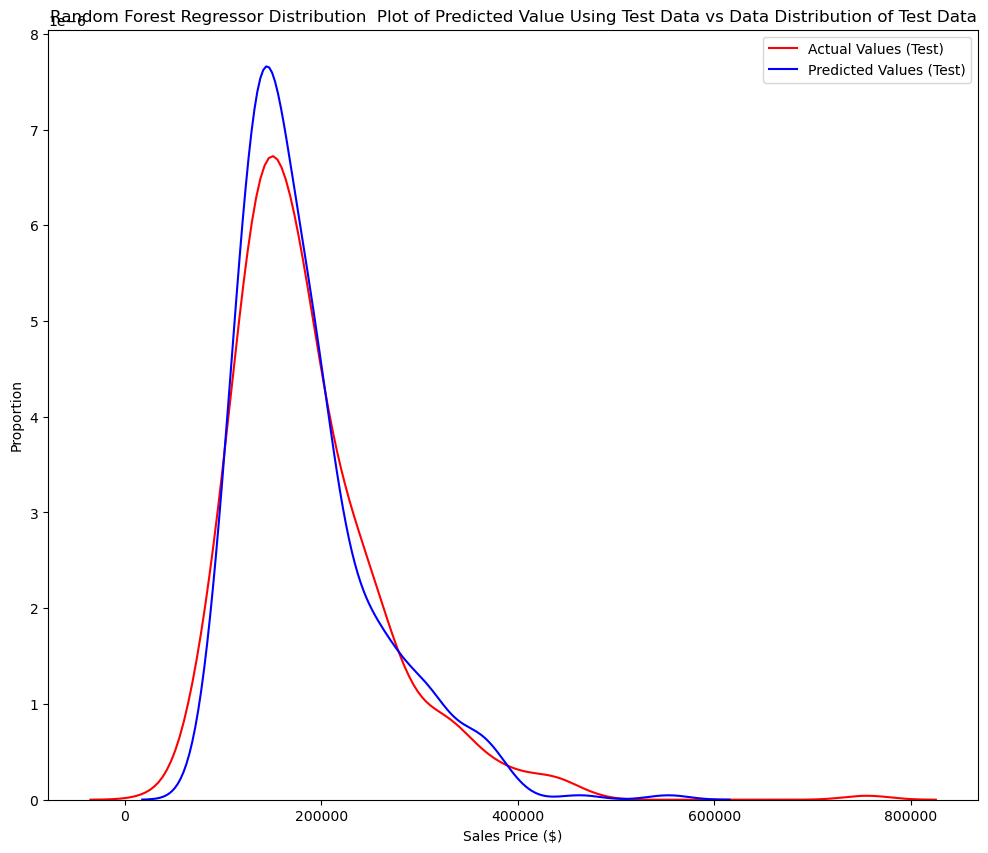

In [94]:
Title='Random Forest Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predr,"Actual Values (Test)","Predicted Values (Test)",Title)

In [95]:
# Model Evaluation for Decision Tree Regressor
predt =pipeline_dt.predict(X_test)

print("R^2:",metrics.r2_score(y_test, predt))
print("Adjusted R^2:",1 - (1-r2_score(y_test, predt))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predt))
print("MSE:",metrics.mean_squared_error(y_test, predt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predt)))

R^2: 0.7558377095869769
Adjusted R^2: 0.15261322739009642
MAE: 25377.67874396135
MSE: 1486561661.4033816
RMSE: 38555.95494088276


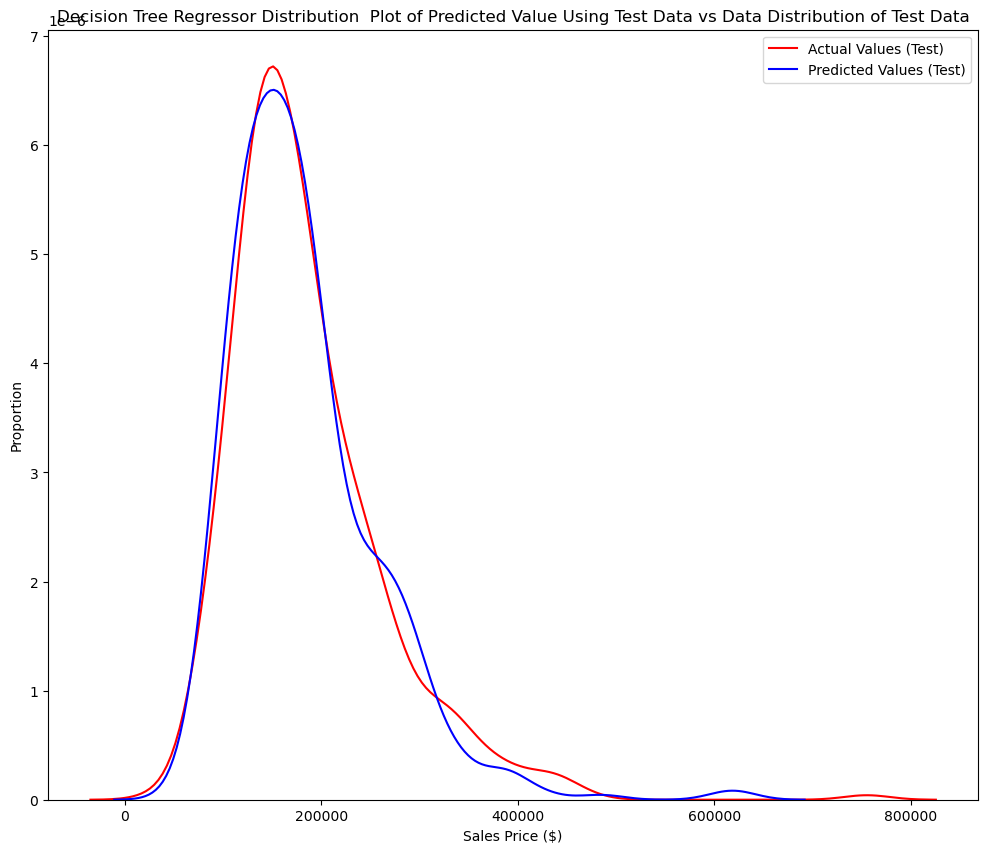

In [96]:
Title='Decision Tree Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predt,"Actual Values (Test)","Predicted Values (Test)",Title)

In [97]:
# Model Evaluation for K Neighbor Regressor
predk = pipeline_kn.predict(X_test)

print("R^2:",metrics.r2_score(y_test, predk))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predk))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predk))
print("MSE:",metrics.mean_squared_error(y_test, predk))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predk)))

R^2: 0.7276855682400827
Adjusted R^2: 0.05490873683322817
MAE: 26158.476328502416
MSE: 1657963616.807343
RMSE: 40718.09937616616


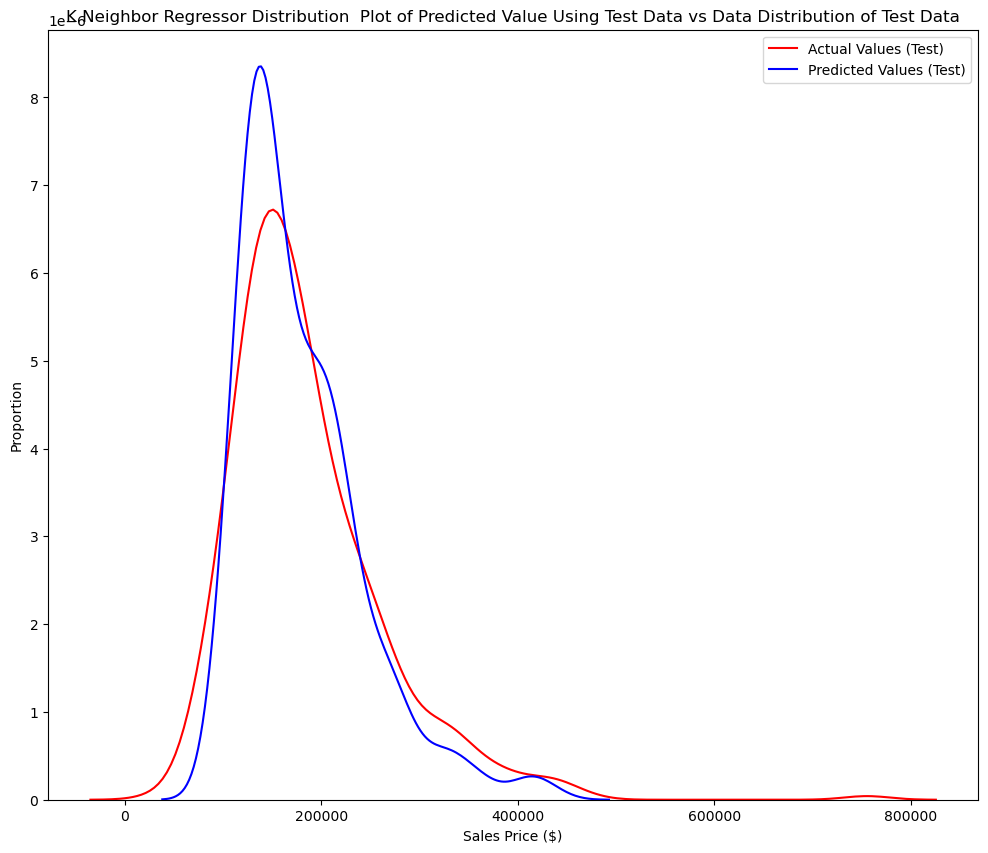

In [98]:
Title='K Neighbor Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predk,"Actual Values (Test)","Predicted Values (Test)",Title)

In [99]:
# Model Evaluation Linear Regressor
predl = pipeline_lr.predict(X_test)

print("R^2:",metrics.r2_score(y_test, predl))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predl))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predl))
print("MSE:",metrics.mean_squared_error(y_test, predl))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predl)))

R^2: -1.7960224700013741e+25
Adjusted R^2: -6.233254454710652e+25
MAE: 4.1225052249298824e+16
MSE: 1.0934932427143719e+35
RMSE: 3.306800935518151e+17


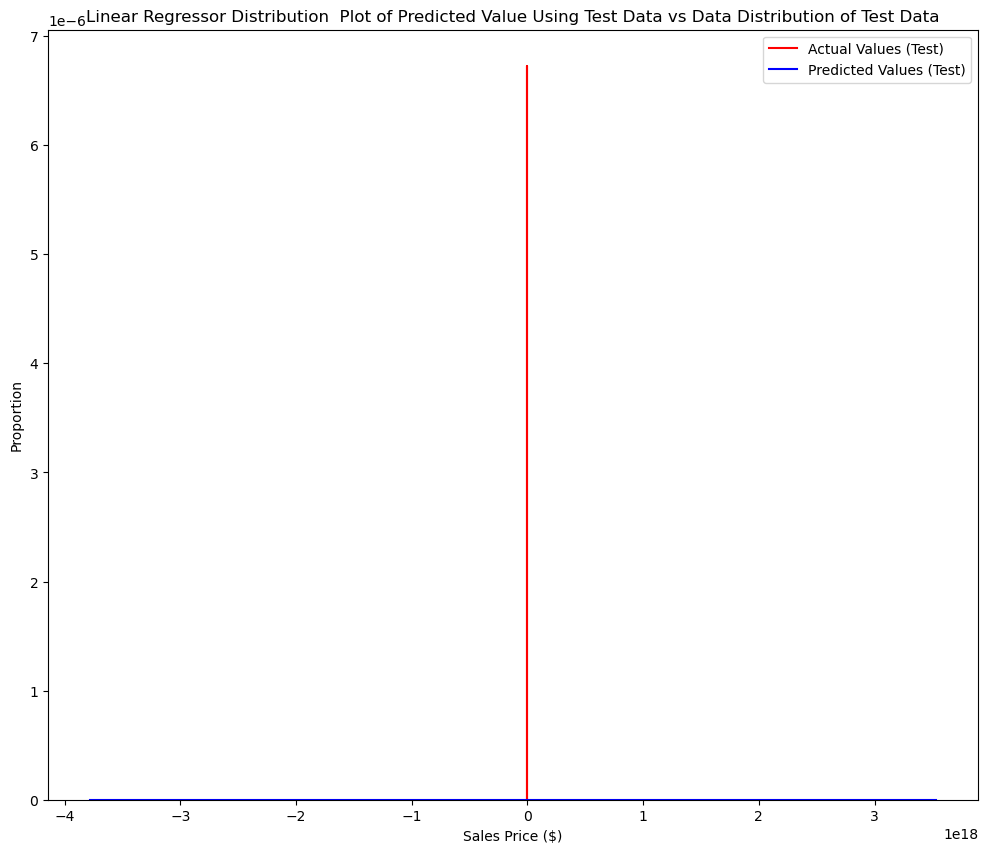

In [100]:
Title='Linear Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predl,"Actual Values (Test)","Predicted Values (Test)",Title)

### The Linear regressor R2 score is negative because it is overfitting

### Lets Try a polynomial Features of degree 2

In [156]:
lr=Pipeline([("scalar1",StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False,degree=2)),
                     ("lr_classifier",LinearRegression())])

In [157]:
lr.fit(X_train, y_train)

Pipeline(steps=[('scalar1', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('lr_classifier', LinearRegression())])

In [158]:
predlpr = lr.predict(X_test)

print("R^2:",metrics.r2_score(y_test, predlpr))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predlpr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predlpr))
print("MSE:",metrics.mean_squared_error(y_test, predlpr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predlpr)))

R^2: 0.7227965349143286
Adjusted R^2: 0.03794091529090515
MAE: 27175.52686515026
MSE: 1687730086.8510795
RMSE: 41081.99224539968


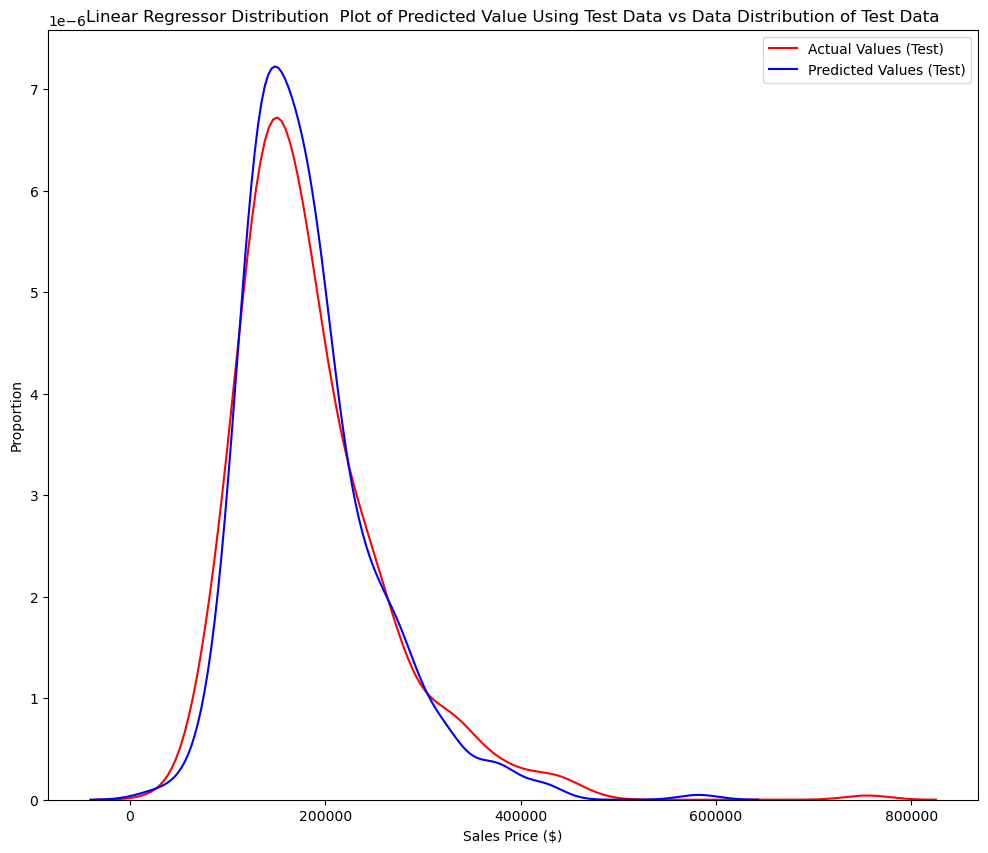

In [159]:
Title='Linear Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predlpr,"Actual Values (Test)","Predicted Values (Test)",Title)

## Linear Regression polynomial of degree 2 
* For Linear Regression for this Data it is a polynomial of degree 2 

## Using GridSearch and  Pipeline

In [113]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [114]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
    "model__normalize":[True, False]
    
}

In [115]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)


In [116]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [117]:
search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=1,
             param_grid={'model__normalize': [True, False],
                         'polynomial__degree': [1, 2, 3]})

In [118]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression(normalize=True))])

In [124]:
best_params = search.best_params_
best_params

{'model__normalize': True, 'polynomial__degree': 2}

In [125]:
best.score(X_test,y_test)

1.0

In [160]:
predicted=best.predict(X_test)
r2_score(y_test,predicted)

1.0

In [161]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Sale Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

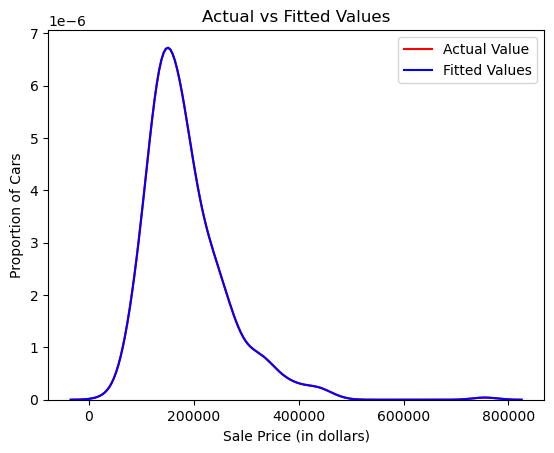

In [162]:
plot_dis(y_test,predicted)